# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: KP Assignment 8-1</h1></font>

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV


In [4]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [5]:
print (X_iris.shape)
print (y_iris.shape)

(150, 4)
(150,)


In [6]:
#Create separate each feature array
a = X_iris[:,0]
b = X_iris[:,1]
c = X_iris[:,2]
d = X_iris[:,3]


#Scale X data
scaler = StandardScaler()
scaler.fit_transform (X_iris,y_iris)
X_scaled = scaler.transform (X_iris)


#Make modified features sets with squares of each feature
X_squares   =  np.vstack (([a**2], [b**2], [c **2], [d**2])).T

#Make modified features set with multiplied pairs of each feature
X_multi = np.vstack ((a*b, a*c, a*d, b*c, b*d, c*d)).T

#Make polynomial transformation n = 10
transform = PolynomialFeatures(10)
transform.fit_transform(X_iris)
X_poly = transform.transform(X_iris)

In [7]:
#Make split for original data
(X_tr_o, X_ts_o, y_tr_o, y_ts_o ) = train_test_split(X_iris, y_iris, stratify=y_iris, test_size= 0.3)

#Make split for scaled data
(X_tr_sc, X_ts_sc, y_tr_sc, y_ts_sc) = train_test_split(X_scaled, y_iris, stratify = y_iris, test_size = 0.30)

#Make split of polynomial extended features set
(X_tr_p, X_ts_p, y_tr_p, y_ts_p ) = train_test_split(X_poly, y_iris, stratify=y_iris, test_size= 0.3)

#Make split of squares of each feature
(X_tr_sq, X_ts_sq, y_tr_sq, y_ts_sq ) = train_test_split(X_squares, y_iris, stratify = y_iris, test_size = 0.3)

#Make split of  multyplied pairs of each feature
(X_tr_m, X_ts_m, y_tr_m, y_ts_m ) = train_test_split(X_multi, y_iris, stratify = y_iris, test_size = 0.3)


In [9]:
#Create estimator class
estimator = LogisticRegression()

#Create param grid
paramgrid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'penalty': ['l1','l2']}

#Create SearchGridCV optimizer
optimizer = GridSearchCV(estimator, paramgrid, cv=10)

#Fit it for original data
optimizer.fit(X_tr_o, y_tr_o)
predict = optimizer.best_estimator_.predict(X_ts_o)
z_o = accuracy_score(y_ts_o,predict)

#Fit it for scaled data
optimizer.fit(X_tr_sc, y_tr_sc)
predict = optimizer.best_estimator_.predict(X_ts_sc)
z_sc = accuracy_score(y_ts_sc,predict)

#Fit it for  multiplied and squared features set
optimizer.fit(X_tr_p, y_tr_p)
predict = optimizer.best_estimator_.predict(X_ts_p)
z_p = accuracy_score(y_ts_p,predict)

#Fit it for squares only of each feature
optimizer.fit(X_tr_sq, y_tr_sq)
predict = optimizer.best_estimator_.predict(X_ts_sq)
z_sq = accuracy_score(y_ts_sq,predict)

#Fit it for multiplaied pairs of features
optimizer.fit(X_tr_m, y_tr_m)
predict = optimizer.best_estimator_.predict(X_ts_m)
z_m = accuracy_score(y_ts_m,predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

In [10]:
print ('Accuracy score for original: {}'.format(  z_o) )
print ('Accuracy score for scaled: {}'.format (  z_sc) )
print ('Accuracy score for polynomial: {}'.format( z_p) )
print ('Accuracy score for squares: {}'.format( z_sq) )
print ('Accuracy score for multi: {}'.format(  z_m) )

Accuracy score for original: 0.9777777777777777
Accuracy score for scaled: 0.9111111111111111
Accuracy score for polynomial: 0.9333333333333333
Accuracy score for squares: 0.9777777777777777
Accuracy score for multi: 0.9111111111111111


<hr><font color="green"><h1>from file: KP Assignment 8-2</h1></font>

In [2]:
import pandas as pd
matches = pd.read_csv("wta_matches_2000.csv")
matches.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round
0,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,1,200001,1.0,NaN,...,Mirjana Lucic,R,NaN,CRO,17.859001,49.0,640.0,6-1 6-2,3,R128
1,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,2,200003,NaN,NaN,...,Kerry Anne Guse,R,NaN,AUS,27.118412,133.0,199.0,6-4 6-2,3,R128
2,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,3,200006,NaN,NaN,...,Jolene Watanabe Giltz,R,NaN,USA,31.378508,118.0,243.0,6-0 6-1,3,R128
3,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,4,200008,NaN,NaN,...,Silvija Talaja,R,NaN,CRO,22.006845,23.0,1112.0,6-1 5-7 7-5,3,R128
4,2000-W-SL-AUS-01A-2000,Australian Open,Hard,128,G,20000117,5,200009,NaN,NaN,...,Rita Grande,R,NaN,ITA,24.821355,60.0,516.0,6-3 6-4,3,R128


In [3]:
import numpy as np

point_diff = (matches.winner_rank_points - matches.loser_rank_points).dropna()
X = point_diff.values[:, np.newaxis]
y = (point_diff > 0).values.astype(int).reshape(-1, 1)

sort_order = np.argsort(X[:, 0])
X = X[sort_order, :]
y = y[sort_order, :]

In [4]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, y.ravel())
y_hat = clf.predict(y[:, 0].reshape(-1, 1))
y_hat = y_hat[sort_order]

In [5]:
pd.Series(y[:, 0]).value_counts()

1    1739
0     836
dtype: int64

In [6]:
pd.Series(y_hat).value_counts()

0    2575
dtype: int64

<AxesSubplot:>

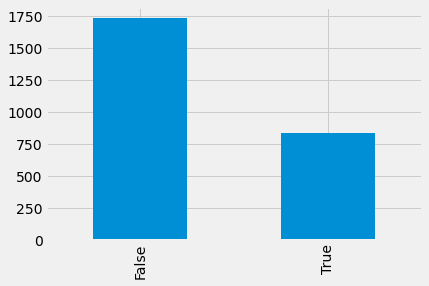

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.Series(y_hat == y[:, 0]).value_counts().plot.bar()

In [8]:
clf.predict_proba(y[:, 0].reshape(-1, 1))

array([[0.83616008, 0.16383992],
       [0.83616008, 0.16383992],
       [0.83616008, 0.16383992],
       ...,
       [0.51919278, 0.48080722],
       [0.51919278, 0.48080722],
       [0.51919278, 0.48080722]])

In [9]:
clf.coef_

array([[1.55312132]])

In [10]:
import math

math.exp(1)**clf.coef_

array([[4.72619918]])